In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [2]:
# Supressing the warnings
import warnings
warnings.simplefilter('ignore')

In [3]:
df = pd.read_csv('Leads.csv')

In [4]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

### Inference: There are many null values present in the dataset e.g : Country, Lead Profile, City

In [6]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## Univariate Analysis

In [7]:
# Let's see for the columns how many categories are present
for col in df.columns:
    if col == 'Prospect ID':
        continue
    if df[col].dtypes == 'object':
        print(df[col].value_counts(normalize = True))
        print('-------------------------------')

Landing Page Submission    0.528788
API                        0.387446
Lead Add Form              0.077706
Lead Import                0.005952
Quick Add Form             0.000108
Name: Lead Origin, dtype: float64
-------------------------------
Google               0.311604
Direct Traffic       0.276293
Olark Chat           0.190678
Organic Search       0.125380
Reference            0.058018
Welingak Website     0.015428
Referral Sites       0.013581
Facebook             0.005976
bing                 0.000652
google               0.000543
Click2call           0.000435
Live Chat            0.000217
Social Media         0.000217
Press_Release        0.000217
testone              0.000109
WeLearn              0.000109
blog                 0.000109
welearnblog_Home     0.000109
Pay per Click Ads    0.000109
youtubechannel       0.000109
NC_EDM               0.000109
Name: Lead Source, dtype: float64
-------------------------------
No     0.920563
Yes    0.079437
Name: Do Not Email, dtype:

### Inference:
1. Some columns are there where some of the categories are less than 1% such as Lead Souce, Last Notable Activity
2. Some columns are there where one of the category is 'Select', this signifies that nothing was selected while feeding the data in the system and the default values goes in it which is equal to null. Eg: Specialization, city, lead profile etc.
3. Some columns are there where only category present is either yes or no . Eg: I agree to pay the amount through cheque, Update me on supply chain content etc.
4. Some columns in the dataset have a highly skewed data in favour of one category e.g.: Do not email, Do not call etc.

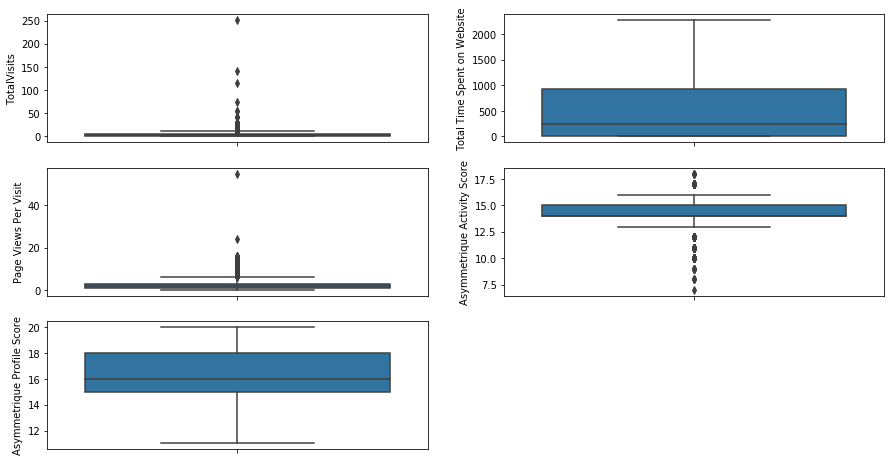

In [8]:
# Plotting boxplots to see the continuous data with target columns(converted)
count = 1
plt.figure(figsize= (15,8))
for col in df.columns:
    if col == 'Lead Number' or col == 'Converted':
        continue
    if df[col].dtypes != 'object':
        plt.subplot(3,2,count)
        sns.boxplot(y = col, data = df)
        count+=1
plt.show()

### Inference: Total Visits, Page Views Per Visit and Asymmetrique Activity Score have some outliers which needs to be treated

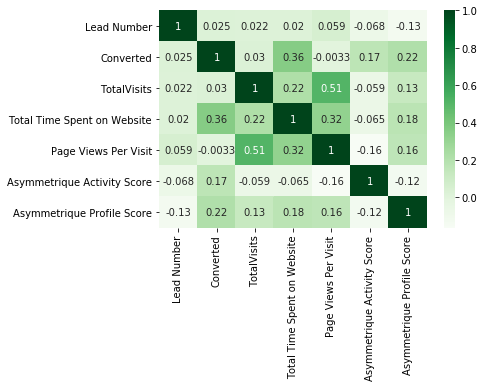

In [9]:
# Generating Heatmap to see the correlation
corr = df.corr()
sns.heatmap(corr, annot = True, cmap ='Greens')
plt.show()

### Inference: Strong correlation is present between Page Views Per Visit and TotalVisits

## MultiVariate Analysis

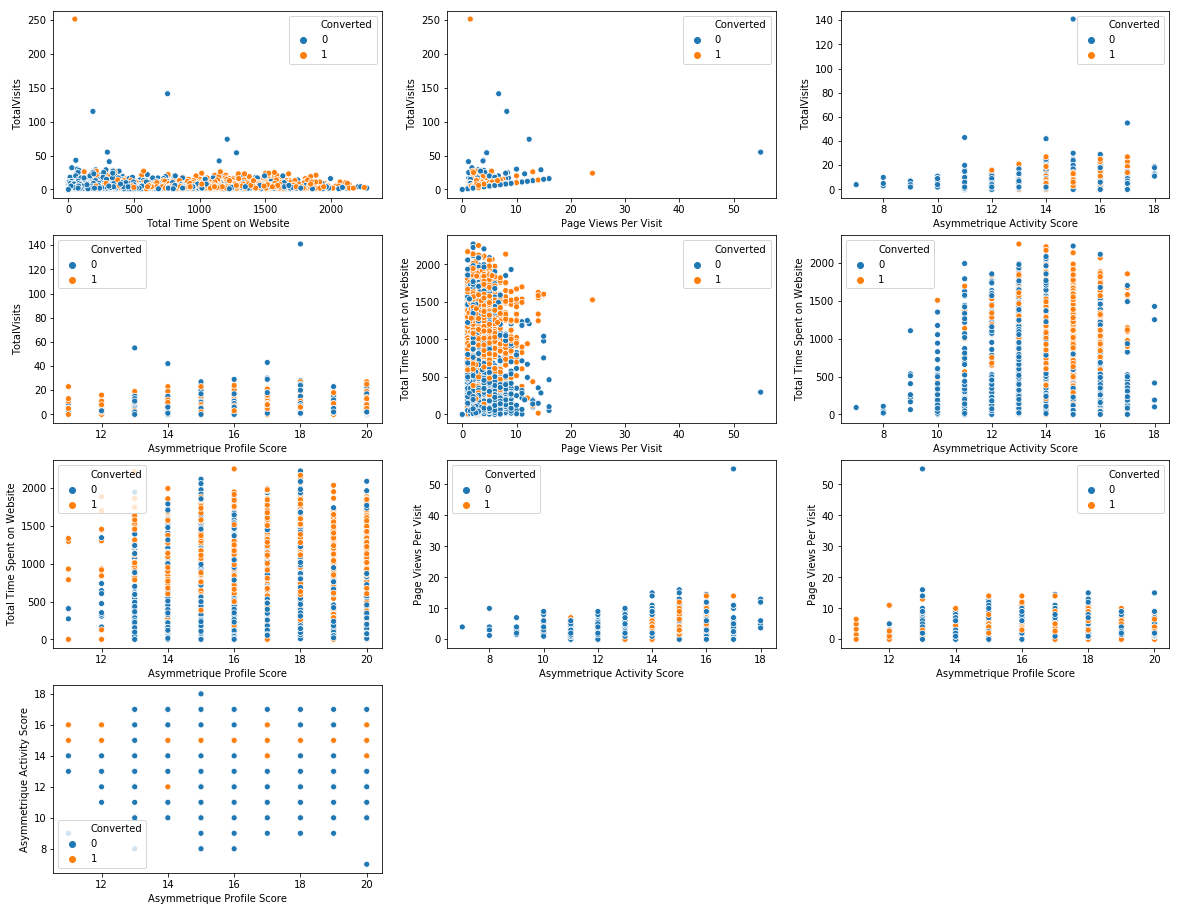

In [10]:
# Creating Scatterplot
count = 1
plt.figure(figsize= (20,20))
for col in enumerate(df.columns):
    if col[1] == 'Lead Number' or col[1] == 'Converted':
        continue
    if df[col[1]].dtypes != 'object':
        for col1 in list(df.columns)[(col[0]+1):]:
            if col1 == 'Lead Number' or col1 == 'Converted':
                continue
            if df[col1].dtypes != 'object':
                plt.subplot(5,3,count)
                sns.scatterplot(y = df[col[1]], x = df[col1], hue = df['Converted'])
                count+=1
plt.show()

### Inference: Total Visits and Page View Per Visit somewhat moves in tandem of each other

## Data Cleaning

In [11]:
# Dropping Total Visits columns as it is having strong correlation with Page Views Per Visit
df.drop(columns = ['TotalVisits'], inplace = True)

In [12]:
#Dropping columns which are just generated Id
df.drop(columns = ['Prospect ID', 'Lead Number'], inplace = True)

In [13]:
# Dropping columns in which only single category is present
df.drop(columns = ['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content',
                  'Get updates on DM Content', 'I agree to pay the amount through cheque'], inplace = True)

In [14]:
# Replacing Select as np.NAN 
for col in df.columns:
    df[col][df[col] == 'Select'] = np.NAN

In [15]:
# Checking null % in columns
null = df.isnull().sum() * 100/len(df)
null

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Newspaper Article                                 0.000000
X Education Forums                                0.000000
Newspaper                                         0.0000

In [16]:
# Dropping columns which have high % of null values 
cols_to_drop = list(null[null>39].index)
df.drop(columns=cols_to_drop, inplace = True)

In [17]:
df.shape

(9240, 21)

In [18]:
# Dropping Columns have high data imbalance
col_to_drop = ['Do Not Email','Do Not Call', 'Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Country','What matters most to you in choosing a course', 'What is your current occupation']
df.drop(columns = col_to_drop, inplace = True)

In [19]:
df.head()

,Lead Origin,Lead Source,Converted,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Tags,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0.0,Page Visited on Website,NaN,Interested in other courses,No,Modified
1,API,Organic Search,0,674,2.5,Email Opened,NaN,Ringing,No,Email Opened
2,Landing Page Submission,Direct Traffic,1,1532,2.0,Email Opened,Business Administration,Will revert after reading the email,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,0,305,1.0,Unreachable,Media and Advertising,Ringing,No,Modified
4,Landing Page Submission,Google,1,1428,1.0,Converted to Lead,NaN,Will revert after reading the email,No,Modified


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 10 columns):
Lead Origin                               9240 non-null object
Lead Source                               9204 non-null object
Converted                                 9240 non-null int64
Total Time Spent on Website               9240 non-null int64
Page Views Per Visit                      9103 non-null float64
Last Activity                             9137 non-null object
Specialization                            5860 non-null object
Tags                                      5887 non-null object
A free copy of Mastering The Interview    9240 non-null object
Last Notable Activity                     9240 non-null object
dtypes: float64(1), int64(2), object(7)
memory usage: 722.0+ KB


### Outlier Treatment

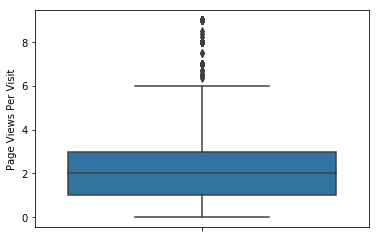

In [21]:
# Outlier Treatment
# Softcapping the threshold values to the 99th percentile
quantile_99 = df['Page Views Per Visit'].quantile(.99)

df['Page Views Per Visit'][ df['Page Views Per Visit'] > quantile_99] = quantile_99
sns.boxplot(y = 'Page Views Per Visit', data = df)
plt.show()

### Inference: Outliers has been capped to 99th percentile

In [22]:
df.shape

(9240, 10)

In [23]:
# Let's see the rows which have high amount of null data and remove those
row_stats = df.isnull().sum(axis = 1) * 100/len(list(df.columns))
row_stats[row_stats >=40]

77      40.0
81      40.0
134     40.0
179     40.0
180     40.0
836     40.0
994     40.0
1393    40.0
2942    40.0
3928    40.0
4605    40.0
5840    50.0
7847    40.0
dtype: float64

In [24]:
# Dropping above rows
index = row_stats[row_stats >=40].index
df.drop(list(index), inplace = True)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9227 entries, 0 to 9239
Data columns (total 10 columns):
Lead Origin                               9227 non-null object
Lead Source                               9196 non-null object
Converted                                 9227 non-null int64
Total Time Spent on Website               9227 non-null int64
Page Views Per Visit                      9103 non-null float64
Last Activity                             9134 non-null object
Specialization                            5860 non-null object
Tags                                      5886 non-null object
A free copy of Mastering The Interview    9227 non-null object
Last Notable Activity                     9227 non-null object
dtypes: float64(1), int64(2), object(7)
memory usage: 792.9+ KB


In [26]:
# Let's impute the null values of remanining columns with median and mode
# Specialization
val = df['Specialization'].mode()
df['Specialization'][df['Specialization'].isnull()] = val[0]

#Lead Source
val = df['Lead Source'].mode()
df['Lead Source'][df['Lead Source'].isnull()] = val[0]

#Total Time Spent on Website
val = df['Total Time Spent on Website'].median()
df['Total Time Spent on Website'][df['Total Time Spent on Website'].isnull()] = val

#Page Views Per Visit
val = df['Page Views Per Visit'].median()
df['Page Views Per Visit'][df['Page Views Per Visit'].isnull()] = val

# Last Activity
val = df['Last Activity'].mode()
df['Last Activity'][df['Last Activity'].isnull()] = val[0]


In [27]:
df.head()

,Lead Origin,Lead Source,Converted,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Tags,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0.0,Page Visited on Website,Finance Management,Interested in other courses,No,Modified
1,API,Organic Search,0,674,2.5,Email Opened,Finance Management,Ringing,No,Email Opened
2,Landing Page Submission,Direct Traffic,1,1532,2.0,Email Opened,Business Administration,Will revert after reading the email,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,0,305,1.0,Unreachable,Media and Advertising,Ringing,No,Modified
4,Landing Page Submission,Google,1,1428,1.0,Converted to Lead,Finance Management,Will revert after reading the email,No,Modified


In [28]:
# As tags, last notable activity, last actiity  are the columns generated by the sales team, thus discarding these 
df.drop(columns = ['Last Notable Activity', 'Tags', 'Last Activity'], inplace = True)

In [29]:
# Replacing values of categories to Other whose total percentage is less than 1% 
df_other  = df['Lead Origin'].value_counts(normalize = True)*100
list(df_other[df_other < 1].index)
df['Lead Origin'][df['Lead Origin'].isin(list(df_other[df_other < 1].index))] = 'Other'

df_other  = df['Lead Source'].value_counts(normalize = True)*100
list(df_other[df_other < 1].index)
df['Lead Source'][df['Lead Source'].isin(list(df_other[df_other < 1].index))] = 'Other'

df_other  = df['Lead Origin'].value_counts(normalize = True)*100
list(df_other[df_other < 1].index)
df['Lead Origin'][df['Lead Origin'].isin(list(df_other[df_other < 1].index))] = 'Other'


df_other  = df['Specialization'].value_counts(normalize = True)*100
list(df_other[df_other < 1].index)
df['Specialization'][df['Specialization'].isin(list(df_other[df_other < 1].index))] = 'Other'


In [30]:
df.head()

,Lead Origin,Lead Source,Converted,Total Time Spent on Website,Page Views Per Visit,Specialization,A free copy of Mastering The Interview
0,API,Olark Chat,0,0,0.0,Finance Management,No
1,API,Organic Search,0,674,2.5,Finance Management,No
2,Landing Page Submission,Direct Traffic,1,1532,2.0,Business Administration,Yes
3,Landing Page Submission,Direct Traffic,0,305,1.0,Media and Advertising,No
4,Landing Page Submission,Google,1,1428,1.0,Finance Management,No


In [31]:
df.shape

(9227, 7)

In [32]:
# Creating Dummy Variables and specifically deleting Other column
def dummiesVariable(var, df, drop_other = True):
    status = pd.get_dummies(df[var])
    if drop_other:
        status.drop(columns = 'Other', inplace = True)
    df.drop(columns = [var], inplace = True)
    return pd.concat([df,status], axis= 1)

In [33]:
df = dummiesVariable('Lead Origin', df)
df = dummiesVariable('Lead Source', df)
df = dummiesVariable('Specialization', df)
df = dummiesVariable('A free copy of Mastering The Interview', df, drop_other = False)
df.drop(columns= ['Yes'], inplace = True)
df.head()

,Converted,Total Time Spent on Website,Page Views Per Visit,API,Landing Page Submission,Lead Add Form,Direct Traffic,Google,Olark Chat,Organic Search,...,Human Resource Management,IT Projects Management,International Business,Marketing Management,Media and Advertising,Operations Management,Retail Management,Supply Chain Management,Travel and Tourism,No
0,0,0,0.0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,0,674,2.5,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,1,1532,2.0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,305,1.0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,1,1428,1.0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9227 entries, 0 to 9239
Data columns (total 29 columns):
Converted                            9227 non-null int64
Total Time Spent on Website          9227 non-null int64
Page Views Per Visit                 9227 non-null float64
API                                  9227 non-null uint8
Landing Page Submission              9227 non-null uint8
Lead Add Form                        9227 non-null uint8
Direct Traffic                       9227 non-null uint8
Google                               9227 non-null uint8
Olark Chat                           9227 non-null uint8
Organic Search                       9227 non-null uint8
Reference                            9227 non-null uint8
Referral Sites                       9227 non-null uint8
Welingak Website                     9227 non-null uint8
Banking, Investment And Insurance    9227 non-null uint8
Business Administration              9227 non-null uint8
E-COMMERCE                          

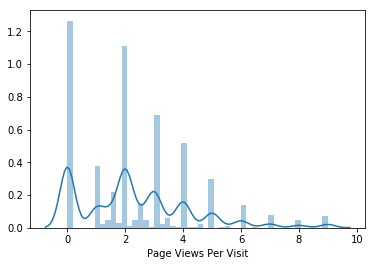

In [35]:
# Plotting histogram to see the data distribution
sns.distplot(df['Page Views Per Visit'])
plt.show()

### Inference:Data is not normally distributed for column Page Views Per Visit

In [36]:
# Dividing data inot features and target
y = df.pop('Converted')
X = df

In [37]:
# Divinding data in train test
X_train, X_test,y_train, y_test = train_test_split(X,y, train_size = .7, random_state = 99)

## Scaling

In [38]:
scaler = MinMaxScaler()
scale_var = ['Total Time Spent on Website','Page Views Per Visit']
X_train[scale_var] = scaler.fit_transform(X_train[scale_var])

## Modeling: Recall is the utmost import metric in this as we want to make sure that we should not greatly miss the hot leads

In [39]:
# Feature Selection using RFE
logres = LogisticRegression()
rfe = RFE(logres, 20)
rfe = rfe.fit(X_train, y_train)

In [40]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('API', True, 1),
 ('Landing Page Submission', True, 1),
 ('Lead Add Form', True, 1),
 ('Direct Traffic', True, 1),
 ('Google', False, 7),
 ('Olark Chat', True, 1),
 ('Organic Search', False, 8),
 ('Reference', True, 1),
 ('Referral Sites', True, 1),
 ('Welingak Website', True, 1),
 ('Banking, Investment And Insurance', True, 1),
 ('Business Administration', True, 1),
 ('E-COMMERCE', True, 1),
 ('Finance Management', True, 1),
 ('Healthcare Management', True, 1),
 ('Hospitality Management', True, 1),
 ('Human Resource Management', False, 4),
 ('IT Projects Management', False, 2),
 ('International Business', False, 6),
 ('Marketing Management', True, 1),
 ('Media and Advertising', False, 3),
 ('Operations Management', True, 1),
 ('Retail Management', True, 1),
 ('Supply Chain Management', False, 5),
 ('Travel and Tourism', True, 1),
 ('No', False, 9)]

In [41]:
# Selecting columns as per the RFE
selected_col = X_train.columns[rfe.support_]

In [42]:
# Scaling test Data
X_test[scale_var] = scaler.transform(X_test[scale_var])

In [43]:
# Lets' generate the VIF of the variables to see the multicolliearity
def generateVIF(cols, df):
    df = df[cols]
    vif = pd.DataFrame()
    vif['features'] = df.columns
    vif['VIF'] = [variance_inflation_factor (df.values, i) for i in range (df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = 'VIF', ascending  = False)
    return vif

## Model 1 

In [44]:
## Creating generic method to generate Model
def createModel(X_train_sm):
    logReg = sm.GLM(y_train, X_train_sm, family= sm.families.Binomial())
    res = logReg.fit()
    return res
    

In [45]:
# Creating model using statsModel
X_train_sm = sm.add_constant(X_train[selected_col])
res = createModel(X_train_sm)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6458
Model:                            GLM   Df Residuals:                     6437
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3250.5
Date:                Mon, 11 Jan 2021   Deviance:                       6501.1
Time:                        21:44:19   Pearson chi2:                 6.77e+03
No. Iterations:                     7   Covariance Type:             nonrobust
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -1.5064      0.475     -3.174      0.002      -2.437      -0.576
Total Time Spent on Website           4.6173      0.151     30.587      0.000       4.321       4.913
Page Views Per Visit                  0.1651      0.191      0.866      0.386      -0.208       0.539
API                                   0.0566      0.472      0.120      0.905      -0.869       0.982
Landing Page Submission              -0.3101      0.475     -0.653      0.514      -1.241       0.621
Lead Add Form                         3.5740      0.723      4.946      0.000       2.158       4.990
Direct Traffic                       -0.3372      0.082     -4.127      0.000      -0.497      -0.177
Olark Chat                            0.7396      0.118      6.282      0.000       0.509       0.970
Reference                             0.2904      0.584      0.497      0.619      -0.855       1.436
Referral Sites                       -0.5539      0.293     -1.887      0.059      -1.129       0.021
Welingak Website                      2.2661      0.903      2.509      0.012       0.496       4.036
Banking, Investment And Insurance     0.2733      0.168      1.628      0.104      -0.056       0.602
Business Administration               0.1192      0.158      0.755      0.450      -0.190       0.428
E-COMMERCE                            0.2096      0.271      0.772      0.440      -0.322       0.741
Finance Management                   -0.6109      0.095     -6.425      0.000      -0.797      -0.425
Healthcare Management                 0.3158      0.229      1.377      0.168      -0.134       0.765
Hospitality Management               -0.4503      0.293     -1.538      0.124      -1.024       0.124
Marketing Management                  0.2088      0.116      1.803      0.071      -0.018       0.436
Operations Management                 0.2548      0.139      1.831      0.067      -0.018       0.527
Retail Management                    -0.3127      0.309     -1.013      0.311      -0.918       0.293
Travel and Tourism                   -0.2931      0.220     -1.331      0.183      -0.725       0.139
=====================================================================================================
"""

In [46]:
# Generating VIF to check the multicollinearity
generateVIF(list(selected_col), X_train)

,features,VIF
4,Lead Add Form,18.55
7,Reference,14.50
3,Landing Page Submission,7.64
2,API,6.67
1,Page Views Per Visit,4.63
9,Welingak Website,4.60
13,Finance Management,4.21
6,Olark Chat,2.78
0,Total Time Spent on Website,2.19
5,Direct Traffic,2.04


In [47]:
y_pred_values = pd.DataFrame(res.fittedvalues,columns = ['Probability'] )
# Combining pred and orginal values
y_pred_values = pd.concat([y_pred_values, y_train], axis = 1)
y_pred_values.head()

,Probability,Converted
5558,0.117196,0
6091,0.701813,1
2160,0.210628,1
1009,0.781149,1
574,0.287866,0


In [48]:
# Considering .9, .8, .7,.6, .5, .4, .3, .2 as threshold to identify the correct threshold limit
y_pred_values['Threshold_.9'] = y_pred_values.apply(lambda x: 0 if x['Probability']<.9 else 1, axis = 1)
y_pred_values['Threshold_.8'] = y_pred_values.apply(lambda x: 0 if x['Probability']<.8 else 1, axis = 1)
y_pred_values['Threshold_.7'] = y_pred_values.apply(lambda x: 0 if x['Probability']<.7 else 1, axis = 1)
y_pred_values['Threshold_.6'] = y_pred_values.apply(lambda x: 0 if x['Probability']<.6 else 1, axis = 1)
y_pred_values['Threshold_.5'] = y_pred_values.apply(lambda x: 0 if x['Probability']<.5 else 1, axis = 1)
y_pred_values['Threshold_.4'] = y_pred_values.apply(lambda x: 0 if x['Probability']<.4 else 1, axis = 1)
y_pred_values['Threshold_.3'] = y_pred_values.apply(lambda x: 0 if x['Probability']<.3 else 1, axis = 1)
y_pred_values['Threshold_.2'] = y_pred_values.apply(lambda x: 0 if x['Probability']<.2 else 1, axis = 1)

In [49]:
# Generating Confusion Metrics for all the threshold Values
for col in list(y_pred_values.columns)[2:]:
    print('Confision Matrix at:',col)
    confusion = metrics.confusion_matrix(y_train, y_pred_values[col])
    print(confusion)
    accuracy= metrics.accuracy_score(y_train, y_pred_values[col])
    print('Accuracy:', accuracy)
    recall = confusion[1][1]/(confusion[1][1] + confusion[1][0])
    print('Recall:', recall)
    precision = confusion[1][1]/(confusion[1][1] + confusion[0][1])
    print('Precision:', precision)
    print('---------------------------------')

Confision Matrix at: Threshold_.9
[[3969   27]
 [2111  351]]
Accuracy: 0.6689377516258904
Recall: 0.14256701868399674
Precision: 0.9285714285714286
---------------------------------
Confision Matrix at: Threshold_.8
[[3882  114]
 [1804  658]]
Accuracy: 0.7030040260142459
Recall: 0.26726238830219334
Precision: 0.8523316062176166
---------------------------------
Confision Matrix at: Threshold_.7
[[3770  226]
 [1520  942]]
Accuracy: 0.7296376587178693
Recall: 0.3826157595450853
Precision: 0.8065068493150684
---------------------------------
Confision Matrix at: Threshold_.6
[[3615  381]
 [1226 1236]]
Accuracy: 0.7511613502632394
Recall: 0.5020308692120228
Precision: 0.764378478664193
---------------------------------
Confision Matrix at: Threshold_.5
[[3508  488]
 [ 989 1473]]
Accuracy: 0.7712914214927222
Recall: 0.5982940698619009
Precision: 0.7511473737888832
---------------------------------
Confision Matrix at: Threshold_.4
[[3378  618]
 [ 813 1649]]
Accuracy: 0.7784143697739239
Reca

In [50]:
# Settig Threshold value as .3 as observed from above computation
threshold = .3

## Model 1 Prediction

In [51]:
# creating method to predict the values of test set
def generatePredTest():
    X_test_sm = sm.add_constant(X_test[selected_col])
    y_test_pred = res.predict(X_test_sm)
    y_test_pred = pd.DataFrame(y_test_pred, columns = ['Pred_Probability'])
    y_test_pred['Actual'] = y_test
    y_test_pred['Lead Score'] = y_test_pred['Pred_Probability'] * 100
    y_test_pred['Threshold' + str(threshold)] = y_test_pred.apply(lambda x: 0 if x['Pred_Probability'] < threshold else 1, axis = 1)
    return y_test_pred

In [52]:
# Predicting Test values
y_test_pred = generatePredTest()
y_test_pred.head()

,Pred_Probability,Actual,Lead Score,Threshold0.3
8162,0.210628,0,21.062847,0
5948,0.092525,0,9.252512,0
7574,0.153958,1,15.395825,0
8534,0.107315,1,10.731456,0
3101,0.169571,0,16.957136,0


In [53]:
# Generating Confusion Matrix , Precision and Recall
def confusionMatrix(y_test, y_test_pred):
    print('Confusion Matrix at: Threshold',threshold)
    confusion = metrics.confusion_matrix(y_test, y_test_pred['Threshold'+str(threshold)])
    print(confusion)
    accuracy= metrics.accuracy_score(y_test, y_test_pred['Threshold'+str(threshold)])
    print('Accuracy:', accuracy)
    recall = confusion[1][1]/(confusion[1][1] + confusion[1][0])
    print('Recall:', recall)
    precision = confusion[1][1]/(confusion[1][1] + confusion[0][1])
    print('Precision:', precision)

confusionMatrix(y_test, y_test_pred)

Confusion Matrix at: Threshold 0.3
[[1313  366]
 [ 238  852]]
Accuracy: 0.7818707114481762
Recall: 0.781651376146789
Precision: 0.6995073891625616


### Inference : 
1. Threshold at .3 looks good with precision and recall
2. P value and VIF are high

## Model 2: Remove API column due to high P value

In [54]:
selected_col = selected_col.drop(['API'])
X_train_sm = sm.add_constant(X_train[selected_col])
res = createModel(X_train_sm)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6458
Model:                            GLM   Df Residuals:                     6438
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3250.5
Date:                Mon, 11 Jan 2021   Deviance:                       6501.1
Time:                        21:44:22   Pearson chi2:                 6.77e+03
No. Iterations:                     7   Covariance Type:             nonrobust
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -1.4517      0.128    -11.347      0.000      -1.702      -1.201
Total Time Spent on Website           4.6180      0.151     30.614      0.000       4.322       4.914
Page Views Per Visit                  0.1665      0.190      0.876      0.381      -0.206       0.539
Landing Page Submission              -0.3658      0.102     -3.591      0.000      -0.565      -0.166
Lead Add Form                         3.5192      0.560      6.288      0.000       2.422       4.616
Direct Traffic                       -0.3369      0.082     -4.126      0.000      -0.497      -0.177
Olark Chat                            0.7414      0.117      6.350      0.000       0.513       0.970
Reference                             0.2904      0.584      0.497      0.619      -0.855       1.436
Referral Sites                       -0.5531      0.293     -1.885      0.059      -1.128       0.022
Welingak Website                      2.2661      0.903      2.509      0.012       0.496       4.036
Banking, Investment And Insurance     0.2732      0.168      1.628      0.104      -0.056       0.602
Business Administration               0.1190      0.158      0.755      0.451      -0.190       0.428
E-COMMERCE                            0.2089      0.271      0.770      0.441      -0.323       0.741
Finance Management                   -0.6110      0.095     -6.426      0.000      -0.797      -0.425
Healthcare Management                 0.3153      0.229      1.375      0.169      -0.134       0.765
Hospitality Management               -0.4503      0.293     -1.538      0.124      -1.024       0.124
Marketing Management                  0.2089      0.116      1.804      0.071      -0.018       0.436
Operations Management                 0.2549      0.139      1.832      0.067      -0.018       0.528
Retail Management                    -0.3126      0.309     -1.012      0.311      -0.918       0.293
Travel and Tourism                   -0.2931      0.220     -1.331      0.183      -0.725       0.139
=====================================================================================================
"""

In [55]:
# Generating VIF to check the multicollinearity
generateVIF(list(selected_col), X_train)

,features,VIF
3,Lead Add Form,18.24
6,Reference,14.48
8,Welingak Website,4.60
2,Landing Page Submission,4.51
1,Page Views Per Visit,3.71
12,Finance Management,2.45
0,Total Time Spent on Website,2.00
4,Direct Traffic,1.99
5,Olark Chat,1.80
15,Marketing Management,1.29


In [56]:
# Creating method to generate Predicted values of train dataset
def generatedPredTrain():
    y_pred_values = pd.DataFrame(res.fittedvalues,columns = ['Probability'] )
    # Combining pred and orginal values and to chck at which point we are getting maximum correct values
    y_pred_values = pd.concat([y_pred_values, y_train], axis = 1)
    y_pred_values['Threshold'+str(threshold)] = y_pred_values.apply(lambda x: 0 if x['Probability']< threshold else 1, axis = 1)
    return y_pred_values

y_pred_values = generatedPredTrain()
y_pred_values.head()

,Probability,Converted,Threshold0.3
5558,0.117249,0,0
6091,0.701787,1,1
2160,0.210621,1,0
1009,0.781216,1,1
574,0.287946,0,0


In [57]:
# Generating confusion Matrix for Train dataset
confusionMatrix(y_train, y_pred_values)

Confusion Matrix at: Threshold 0.3
[[3139  857]
 [ 606 1856]]
Accuracy: 0.7734592753174357
Recall: 0.7538586515028433
Precision: 0.684113527460376


## Model 2 Prediction

In [58]:
y_test_pred = generatePredTest()
y_test_pred.head()

,Pred_Probability,Actual,Lead Score,Threshold0.3
8162,0.210621,0,21.062087,0
5948,0.092465,0,9.246512,0
7574,0.153918,1,15.391833,0
8534,0.107279,1,10.727896,0
3101,0.169541,0,16.954082,0


In [59]:
# Generating confusion Matrix for test dataset
confusionMatrix(y_test, y_test_pred)

Confusion Matrix at: Threshold 0.3
[[1313  366]
 [ 238  852]]
Accuracy: 0.7818707114481762
Recall: 0.781651376146789
Precision: 0.6995073891625616


### Inference : 
1. P value and VIF are still high

## Model 3: Removing Reference

In [60]:
selected_col = selected_col.drop(['Reference'])
X_train_sm = sm.add_constant(X_train[selected_col])
res = createModel(X_train_sm)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6458
Model:                            GLM   Df Residuals:                     6439
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3250.7
Date:                Mon, 11 Jan 2021   Deviance:                       6501.3
Time:                        21:44:23   Pearson chi2:                 6.77e+03
No. Iterations:                     7   Covariance Type:             nonrobust
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -1.4501      0.128    -11.340      0.000      -1.701      -1.199
Total Time Spent on Website           4.6182      0.151     30.615      0.000       4.323       4.914
Page Views Per Visit                  0.1663      0.190      0.875      0.382      -0.206       0.539
Landing Page Submission              -0.3670      0.102     -3.604      0.000      -0.567      -0.167
Lead Add Form                         3.7807      0.205     18.465      0.000       3.379       4.182
Direct Traffic                       -0.3369      0.082     -4.126      0.000      -0.497      -0.177
Olark Chat                            0.7415      0.117      6.349      0.000       0.513       0.970
Referral Sites                       -0.5530      0.293     -1.884      0.059      -1.128       0.022
Welingak Website                      2.0050      0.738      2.715      0.007       0.558       3.452
Banking, Investment And Insurance     0.2736      0.168      1.630      0.103      -0.055       0.603
Business Administration               0.1191      0.158      0.755      0.450      -0.190       0.428
E-COMMERCE                            0.2088      0.271      0.770      0.441      -0.323       0.741
Finance Management                   -0.6129      0.095     -6.452      0.000      -0.799      -0.427
Healthcare Management                 0.3155      0.229      1.377      0.169      -0.134       0.765
Hospitality Management               -0.4489      0.293     -1.534      0.125      -1.022       0.125
Marketing Management                  0.2090      0.116      1.805      0.071      -0.018       0.436
Operations Management                 0.2545      0.139      1.829      0.067      -0.018       0.527
Retail Management                    -0.3128      0.309     -1.013      0.311      -0.918       0.292
Travel and Tourism                   -0.2935      0.220     -1.332      0.183      -0.725       0.138
=====================================================================================================
"""

In [61]:
# Generating VIF to check the multicollinearity
generateVIF(list(selected_col), X_train)

,features,VIF
2,Landing Page Submission,4.51
1,Page Views Per Visit,3.71
11,Finance Management,2.44
0,Total Time Spent on Website,2.00
4,Direct Traffic,1.99
5,Olark Chat,1.80
3,Lead Add Form,1.41
14,Marketing Management,1.29
7,Welingak Website,1.27
15,Operations Management,1.18


In [62]:
y_pred_values = generatedPredTrain()
# Generating confusion Matrix for Train dataset
confusionMatrix(y_train, y_pred_values)

Confusion Matrix at: Threshold 0.3
[[3139  857]
 [ 606 1856]]
Accuracy: 0.7734592753174357
Recall: 0.7538586515028433
Precision: 0.684113527460376


## Model 3 Prediction

In [63]:
y_test_pred = generatePredTest()
y_test_pred.head()

,Pred_Probability,Actual,Lead Score,Threshold0.3
8162,0.210567,0,21.056664,0
5948,0.092332,0,9.233156,0
7574,0.153708,1,15.370773,0
8534,0.107123,1,10.712305,0
3101,0.169578,0,16.957827,0


In [64]:
# Generating confusion Matrix for Test dataset
confusionMatrix(y_test, y_test_pred)

Confusion Matrix at: Threshold 0.3
[[1313  366]
 [ 238  852]]
Accuracy: 0.7818707114481762
Recall: 0.781651376146789
Precision: 0.6995073891625616


### Inference : 
1. P value is still high

## Model 4 : Removing Business Administration

In [65]:
selected_col = selected_col.drop(['Business Administration'])
X_train_sm = sm.add_constant(X_train[selected_col])
res = createModel(X_train_sm)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6458
Model:                            GLM   Df Residuals:                     6440
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3250.9
Date:                Mon, 11 Jan 2021   Deviance:                       6501.9
Time:                        21:44:24   Pearson chi2:                 6.77e+03
No. Iterations:                     7   Covariance Type:             nonrobust
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -1.4324      0.126    -11.402      0.000      -1.679      -1.186
Total Time Spent on Website           4.6187      0.151     30.620      0.000       4.323       4.914
Page Views Per Visit                  0.1654      0.190      0.870      0.384      -0.207       0.538
Landing Page Submission              -0.3656      0.102     -3.590      0.000      -0.565      -0.166
Lead Add Form                         3.7809      0.205     18.466      0.000       3.380       4.182
Direct Traffic                       -0.3371      0.082     -4.127      0.000      -0.497      -0.177
Olark Chat                            0.7416      0.117      6.352      0.000       0.513       0.970
Referral Sites                       -0.5550      0.293     -1.891      0.059      -1.130       0.020
Welingak Website                      2.0056      0.738      2.716      0.007       0.559       3.453
Banking, Investment And Insurance     0.2550      0.166      1.536      0.124      -0.070       0.580
E-COMMERCE                            0.1902      0.270      0.704      0.481      -0.339       0.720
Finance Management                   -0.6308      0.092     -6.863      0.000      -0.811      -0.451
Healthcare Management                 0.2969      0.228      1.303      0.192      -0.150       0.743
Hospitality Management               -0.4676      0.292     -1.604      0.109      -1.039       0.104
Marketing Management                  0.1903      0.113      1.683      0.092      -0.031       0.412
Operations Management                 0.2359      0.137      1.723      0.085      -0.032       0.504
Retail Management                    -0.3315      0.308     -1.077      0.281      -0.935       0.272
Travel and Tourism                   -0.3122      0.219     -1.426      0.154      -0.741       0.117
=====================================================================================================
"""

In [66]:
# Generating VIF to check the multicollinearity
generateVIF(list(selected_col), X_train)

,features,VIF
2,Landing Page Submission,4.44
1,Page Views Per Visit,3.68
10,Finance Management,2.36
0,Total Time Spent on Website,1.99
4,Direct Traffic,1.99
5,Olark Chat,1.76
3,Lead Add Form,1.40
7,Welingak Website,1.27
13,Marketing Management,1.26
14,Operations Management,1.15


In [67]:
y_pred_values = generatedPredTrain()

# Generating confusion Matrix for Train dataset
confusionMatrix(y_train, y_pred_values)

Confusion Matrix at: Threshold 0.3
[[3137  859]
 [ 608 1854]]
Accuracy: 0.7728398885103748
Recall: 0.7530463038180342
Precision: 0.6833763361592333


## Model 4 Prediction

In [68]:
y_test_pred = generatePredTest()
y_test_pred.head()

,Pred_Probability,Actual,Lead Score,Threshold0.3
8162,0.210555,0,21.055513,0
5948,0.092423,0,9.242348,0
7574,0.153830,1,15.382978,0
8534,0.107209,1,10.720852,0
3101,0.172247,0,17.224710,0


In [69]:
# Generating confusion Matrix for Test dataset
confusionMatrix(y_test, y_test_pred)

Confusion Matrix at: Threshold 0.3
[[1310  369]
 [ 238  852]]
Accuracy: 0.7807872878295413
Recall: 0.781651376146789
Precision: 0.6977886977886978


### Inference :
P value is still high

## Model 5 : Removing E-COMMERCE

In [70]:
selected_col = selected_col.drop(['E-COMMERCE'])
X_train_sm = sm.add_constant(X_train[selected_col])
res = createModel(X_train_sm)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6458
Model:                            GLM   Df Residuals:                     6441
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3251.2
Date:                Mon, 11 Jan 2021   Deviance:                       6502.4
Time:                        21:44:25   Pearson chi2:                 6.77e+03
No. Iterations:                     7   Covariance Type:             nonrobust
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -1.4239      0.125    -11.390      0.000      -1.669      -1.179
Total Time Spent on Website           4.6142      0.151     30.629      0.000       4.319       4.909
Page Views Per Visit                  0.1668      0.190      0.877      0.380      -0.206       0.539
Landing Page Submission              -0.3658      0.102     -3.594      0.000      -0.565      -0.166
Lead Add Form                         3.7801      0.205     18.463      0.000       3.379       4.181
Direct Traffic                       -0.3348      0.082     -4.103      0.000      -0.495      -0.175
Olark Chat                            0.7410      0.117      6.346      0.000       0.512       0.970
Referral Sites                       -0.5558      0.293     -1.894      0.058      -1.131       0.019
Welingak Website                      2.0055      0.738      2.716      0.007       0.558       3.453
Banking, Investment And Insurance     0.2465      0.165      1.490      0.136      -0.078       0.571
Finance Management                   -0.6386      0.091     -7.002      0.000      -0.817      -0.460
Healthcare Management                 0.2883      0.227      1.268      0.205      -0.157       0.734
Hospitality Management               -0.4753      0.291     -1.632      0.103      -1.046       0.096
Marketing Management                  0.1820      0.112      1.619      0.105      -0.038       0.402
Operations Management                 0.2274      0.136      1.669      0.095      -0.040       0.495
Retail Management                    -0.3397      0.307     -1.105      0.269      -0.942       0.263
Travel and Tourism                   -0.3203      0.218     -1.466      0.143      -0.749       0.108
=====================================================================================================
"""

In [71]:
# Generating VIF to check the multicollinearity
generateVIF(list(selected_col), X_train)

,features,VIF
2,Landing Page Submission,4.43
1,Page Views Per Visit,3.67
9,Finance Management,2.34
0,Total Time Spent on Website,1.99
4,Direct Traffic,1.99
5,Olark Chat,1.75
3,Lead Add Form,1.39
7,Welingak Website,1.27
12,Marketing Management,1.25
13,Operations Management,1.15


In [72]:
# Generating Prediction for Train Dataset
y_pred_values = generatedPredTrain()
# Generating confusion Matrix for Train dataset
confusionMatrix(y_train, y_pred_values)

Confusion Matrix at: Threshold 0.3
[[3141  855]
 [ 608 1854]]
Accuracy: 0.7734592753174357
Recall: 0.7530463038180342
Precision: 0.6843853820598007


## Model 5 Prediction

In [73]:
# Generating Prediction for Test Dataset
y_test_pred = generatePredTest()
# Generating confusion Matrix for Train dataset
confusionMatrix(y_test, y_test_pred)

Confusion Matrix at: Threshold 0.3
[[1315  364]
 [ 239  851]]
Accuracy: 0.7822318526543879
Recall: 0.7807339449541284
Precision: 0.7004115226337448


### Inference :
P value is still high

## Model 6 - Removing Page Views Per Visit

In [74]:
selected_col = selected_col.drop(['Page Views Per Visit'])
X_train_sm = sm.add_constant(X_train[selected_col])
res = createModel(X_train_sm)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6458
Model:                            GLM   Df Residuals:                     6442
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3251.6
Date:                Mon, 11 Jan 2021   Deviance:                       6503.1
Time:                        21:44:26   Pearson chi2:                 6.76e+03
No. Iterations:                     7   Covariance Type:             nonrobust
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -1.3732      0.111    -12.404      0.000      -1.590      -1.156
Total Time Spent on Website           4.6183      0.151     30.673      0.000       4.323       4.913
Landing Page Submission              -0.3471      0.100     -3.486      0.000      -0.542      -0.152
Lead Add Form                         3.7350      0.198     18.858      0.000       3.347       4.123
Direct Traffic                       -0.3511      0.079     -4.418      0.000      -0.507      -0.195
Olark Chat                            0.6979      0.106      6.602      0.000       0.491       0.905
Referral Sites                       -0.5358      0.292     -1.835      0.066      -1.108       0.036
Welingak Website                      2.0059      0.738      2.717      0.007       0.559       3.453
Banking, Investment And Insurance     0.2529      0.165      1.530      0.126      -0.071       0.577
Finance Management                   -0.6443      0.091     -7.080      0.000      -0.823      -0.466
Healthcare Management                 0.2918      0.227      1.283      0.200      -0.154       0.738
Hospitality Management               -0.4740      0.291     -1.627      0.104      -1.045       0.097
Marketing Management                  0.1798      0.112      1.600      0.110      -0.040       0.400
Operations Management                 0.2239      0.136      1.643      0.100      -0.043       0.491
Retail Management                    -0.3419      0.308     -1.111      0.266      -0.945       0.261
Travel and Tourism                   -0.3143      0.218     -1.440      0.150      -0.742       0.114
=====================================================================================================
"""

In [75]:
# Generating VIF to check the multicollinearity
generateVIF(list(selected_col), X_train)

,features,VIF
1,Landing Page Submission,2.89
8,Finance Management,2.07
3,Direct Traffic,1.92
0,Total Time Spent on Website,1.86
4,Olark Chat,1.67
2,Lead Add Form,1.39
6,Welingak Website,1.27
11,Marketing Management,1.23
12,Operations Management,1.14
7,"Banking, Investment And Insurance",1.10


In [76]:
y_pred_values = generatedPredTrain()
confusionMatrix(y_train, y_pred_values)

Confusion Matrix at: Threshold 0.3
[[3149  847]
 [ 608 1854]]
Accuracy: 0.7746980489315578
Recall: 0.7530463038180342
Precision: 0.6864124398370973


## Model 6 Prediction

In [77]:
y_test_pred = generatePredTest()
confusionMatrix(y_test, y_test_pred)

Confusion Matrix at: Threshold 0.3
[[1318  361]
 [ 241  849]]
Accuracy: 0.7825929938605994
Recall: 0.7788990825688074
Precision: 0.7016528925619835


### Inference :
P value is still high

## Model 7: Removing Retail Management

In [78]:
selected_col = selected_col.drop(['Retail Management'])
X_train_sm = sm.add_constant(X_train[selected_col])
res = createModel(X_train_sm)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6458
Model:                            GLM   Df Residuals:                     6443
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3252.2
Date:                Mon, 11 Jan 2021   Deviance:                       6504.4
Time:                        21:44:27   Pearson chi2:                 6.75e+03
No. Iterations:                     7   Covariance Type:             nonrobust
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -1.3842      0.110    -12.550      0.000      -1.600      -1.168
Total Time Spent on Website           4.6167      0.151     30.669      0.000       4.322       4.912
Landing Page Submission              -0.3478      0.100     -3.494      0.000      -0.543      -0.153
Lead Add Form                         3.7360      0.198     18.864      0.000       3.348       4.124
Direct Traffic                       -0.3505      0.079     -4.411      0.000      -0.506      -0.195
Olark Chat                            0.6975      0.106      6.600      0.000       0.490       0.905
Referral Sites                       -0.5342      0.292     -1.830      0.067      -1.106       0.038
Welingak Website                      2.0050      0.738      2.716      0.007       0.558       3.452
Banking, Investment And Insurance     0.2647      0.165      1.605      0.109      -0.059       0.588
Finance Management                   -0.6328      0.090     -6.998      0.000      -0.810      -0.456
Healthcare Management                 0.3035      0.227      1.336      0.182      -0.142       0.749
Hospitality Management               -0.4620      0.291     -1.587      0.113      -1.033       0.109
Marketing Management                  0.1916      0.112      1.712      0.087      -0.028       0.411
Operations Management                 0.2357      0.136      1.735      0.083      -0.031       0.502
Travel and Tourism                   -0.3023      0.218     -1.386      0.166      -0.730       0.125
=====================================================================================================
"""

In [79]:
# Generating VIF to check the multicollinearity
generateVIF(list(selected_col), X_train)

,features,VIF
1,Landing Page Submission,2.85
8,Finance Management,2.06
3,Direct Traffic,1.92
0,Total Time Spent on Website,1.86
4,Olark Chat,1.67
2,Lead Add Form,1.38
6,Welingak Website,1.27
11,Marketing Management,1.23
12,Operations Management,1.14
7,"Banking, Investment And Insurance",1.09


In [80]:
y_pred_values = generatedPredTrain()
confusionMatrix(y_train, y_pred_values)

Confusion Matrix at: Threshold 0.3
[[3151  845]
 [ 607 1855]]
Accuracy: 0.7751625890368535
Recall: 0.7534524776604387
Precision: 0.687037037037037


## Model 7 Prediction

In [81]:
y_test_pred = generatePredTest()
confusionMatrix(y_test, y_test_pred)

Confusion Matrix at: Threshold 0.3
[[1317  362]
 [ 239  851]]
Accuracy: 0.7829541350668111
Recall: 0.7807339449541284
Precision: 0.7015663643858203


### Inference :
P value is still high

## Model 8 :Removing Healthcare Management

In [82]:
selected_col = selected_col.drop(['Healthcare Management'])
X_train_sm = sm.add_constant(X_train[selected_col])
res = createModel(X_train_sm)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6458
Model:                            GLM   Df Residuals:                     6444
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3253.1
Date:                Mon, 11 Jan 2021   Deviance:                       6506.2
Time:                        21:44:28   Pearson chi2:                 6.76e+03
No. Iterations:                     7   Covariance Type:             nonrobust
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -1.3645      0.109    -12.498      0.000      -1.578      -1.150
Total Time Spent on Website           4.6154      0.151     30.665      0.000       4.320       4.910
Landing Page Submission              -0.3504      0.099     -3.522      0.000      -0.545      -0.155
Lead Add Form                         3.7366      0.198     18.870      0.000       3.348       4.125
Direct Traffic                       -0.3493      0.079     -4.396      0.000      -0.505      -0.194
Olark Chat                            0.6973      0.106      6.599      0.000       0.490       0.904
Referral Sites                       -0.5366      0.292     -1.839      0.066      -1.109       0.035
Welingak Website                      2.0044      0.738      2.715      0.007       0.557       3.451
Banking, Investment And Insurance     0.2470      0.164      1.502      0.133      -0.075       0.569
Finance Management                   -0.6519      0.089     -7.304      0.000      -0.827      -0.477
Hospitality Management               -0.4796      0.291     -1.649      0.099      -1.050       0.090
Marketing Management                  0.1738      0.111      1.565      0.118      -0.044       0.392
Operations Management                 0.2180      0.135      1.613      0.107      -0.047       0.483
Travel and Tourism                   -0.3196      0.218     -1.469      0.142      -0.746       0.107
=====================================================================================================
"""

In [83]:
# Generating VIF to check the multicollinearity
generateVIF(list(selected_col), X_train)

,features,VIF
1,Landing Page Submission,2.82
8,Finance Management,2.04
3,Direct Traffic,1.92
0,Total Time Spent on Website,1.85
4,Olark Chat,1.66
2,Lead Add Form,1.37
6,Welingak Website,1.27
10,Marketing Management,1.22
11,Operations Management,1.13
7,"Banking, Investment And Insurance",1.09


In [84]:
y_pred_values =  generatedPredTrain()
confusionMatrix(y_train, y_pred_values)

Confusion Matrix at: Threshold 0.3
[[3156  840]
 [ 605 1857]]
Accuracy: 0.7762465159492102
Recall: 0.7542648253452477
Precision: 0.6885428253615128


## Model 8 Prediction

In [85]:
y_test_pred = generatePredTest()
confusionMatrix(y_test, y_test_pred)

Confusion Matrix at: Threshold 0.3
[[1319  360]
 [ 240  850]]
Accuracy: 0.7833152762730228
Recall: 0.7798165137614679
Precision: 0.7024793388429752


### Inference : 
1. P value is still high

## Model 9 : Removing Travel and Tourism

In [86]:
selected_col = selected_col.drop(['Travel and Tourism'])
X_train_sm = sm.add_constant(X_train[selected_col])
res = createModel(X_train_sm)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6458
Model:                            GLM   Df Residuals:                     6445
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3254.2
Date:                Mon, 11 Jan 2021   Deviance:                       6508.4
Time:                        21:44:29   Pearson chi2:                 6.76e+03
No. Iterations:                     7   Covariance Type:             nonrobust
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -1.3828      0.109    -12.740      0.000      -1.596      -1.170
Total Time Spent on Website           4.6132      0.150     30.663      0.000       4.318       4.908
Landing Page Submission              -0.3544      0.099     -3.564      0.000      -0.549      -0.159
Lead Add Form                         3.7403      0.198     18.891      0.000       3.352       4.128
Direct Traffic                       -0.3436      0.079     -4.330      0.000      -0.499      -0.188
Olark Chat                            0.6974      0.106      6.601      0.000       0.490       0.904
Referral Sites                       -0.5355      0.292     -1.836      0.066      -1.107       0.036
Welingak Website                      2.0013      0.738      2.711      0.007       0.554       3.448
Banking, Investment And Insurance     0.2667      0.164      1.628      0.104      -0.054       0.588
Finance Management                   -0.6331      0.088     -7.164      0.000      -0.806      -0.460
Hospitality Management               -0.4592      0.291     -1.581      0.114      -1.029       0.110
Marketing Management                  0.1937      0.110      1.756      0.079      -0.022       0.410
Operations Management                 0.2379      0.134      1.769      0.077      -0.026       0.502
=====================================================================================================
"""

In [87]:
# Generating VIF to check the multicollinearity
generateVIF(list(selected_col), X_train)

,features,VIF
1,Landing Page Submission,2.74
8,Finance Management,2.03
3,Direct Traffic,1.92
0,Total Time Spent on Website,1.85
4,Olark Chat,1.65
2,Lead Add Form,1.37
6,Welingak Website,1.27
10,Marketing Management,1.21
11,Operations Management,1.13
7,"Banking, Investment And Insurance",1.09


In [88]:
y_pred_values = generatedPredTrain()
confusionMatrix(y_train, y_pred_values)

Confusion Matrix at: Threshold 0.3
[[3156  840]
 [ 604 1858]]
Accuracy: 0.7764013626509755
Recall: 0.7546709991876523
Precision: 0.6886582653817642


## Model 9 Prediction

In [89]:
y_test_pred = generatePredTest()
confusionMatrix(y_test, y_test_pred)

Confusion Matrix at: Threshold 0.3
[[1319  360]
 [ 240  850]]
Accuracy: 0.7833152762730228
Recall: 0.7798165137614679
Precision: 0.7024793388429752


### Inference : 
1. P value is still high

## Model 10: Removing Hospitality Management

In [90]:
selected_col = selected_col.drop(['Hospitality Management'])
X_train_sm = sm.add_constant(X_train[selected_col])
res = createModel(X_train_sm)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6458
Model:                            GLM   Df Residuals:                     6446
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3255.4
Date:                Mon, 11 Jan 2021   Deviance:                       6510.9
Time:                        21:44:30   Pearson chi2:                 6.76e+03
No. Iterations:                     7   Covariance Type:             nonrobust
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -1.3956      0.108    -12.892      0.000      -1.608      -1.183
Total Time Spent on Website           4.6029      0.150     30.650      0.000       4.309       4.897
Landing Page Submission              -0.3543      0.099     -3.564      0.000      -0.549      -0.159
Lead Add Form                         3.7313      0.198     18.862      0.000       3.344       4.119
Direct Traffic                       -0.3411      0.079     -4.300      0.000      -0.496      -0.186
Olark Chat                            0.6953      0.106      6.584      0.000       0.488       0.902
Referral Sites                       -0.5331      0.292     -1.828      0.067      -1.105       0.038
Welingak Website                      2.0084      0.738      2.720      0.007       0.561       3.455
Banking, Investment And Insurance     0.2816      0.164      1.722      0.085      -0.039       0.602
Finance Management                   -0.6176      0.088     -7.034      0.000      -0.790      -0.446
Marketing Management                  0.2086      0.110      1.899      0.058      -0.007       0.424
Operations Management                 0.2526      0.134      1.884      0.060      -0.010       0.515
=====================================================================================================
"""

In [91]:
# Generating VIF to check the multicollinearity
generateVIF(list(selected_col), X_train)

,features,VIF
1,Landing Page Submission,2.72
8,Finance Management,2.01
3,Direct Traffic,1.92
0,Total Time Spent on Website,1.84
4,Olark Chat,1.65
2,Lead Add Form,1.36
6,Welingak Website,1.27
9,Marketing Management,1.20
10,Operations Management,1.12
7,"Banking, Investment And Insurance",1.08


In [92]:
y_pred_values = generatedPredTrain()
confusionMatrix(y_train, y_pred_values)

Confusion Matrix at: Threshold 0.3
[[3157  839]
 [ 605 1857]]
Accuracy: 0.7764013626509755
Recall: 0.7542648253452477
Precision: 0.6887982195845698


## Model 10 Prediction

In [93]:
y_test_pred = generatePredTest()
confusionMatrix(y_test, y_test_pred)

Confusion Matrix at: Threshold 0.3
[[1316  363]
 [ 239  851]]
Accuracy: 0.7825929938605994
Recall: 0.7807339449541284
Precision: 0.7009884678747941


### Inference : 
1. P value is still high

## Model 11: Removing Banking, Investment And Insurance

In [94]:
selected_col = selected_col.drop(['Banking, Investment And Insurance'])
X_train_sm = sm.add_constant(X_train[selected_col])
res = createModel(X_train_sm)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6458
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3256.9
Date:                Mon, 11 Jan 2021   Deviance:                       6513.8
Time:                        21:44:30   Pearson chi2:                 6.77e+03
No. Iterations:                     7   Covariance Type:             nonrobust
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -1.3693      0.107    -12.793      0.000      -1.579      -1.159
Total Time Spent on Website     4.6063      0.150     30.674      0.000       4.312       4.901
Landing Page Submission        -0.3560      0.099     -3.582      0.000      -0.551      -0.161
Lead Add Form                   3.7370      0.198     18.894      0.000       3.349       4.125
Direct Traffic                 -0.3384      0.079     -4.270      0.000      -0.494      -0.183
Olark Chat                      0.6978      0.106      6.610      0.000       0.491       0.905
Referral Sites                 -0.5274      0.291     -1.810      0.070      -1.098       0.044
Welingak Website                2.0032      0.738      2.713      0.007       0.556       3.450
Finance Management             -0.6459      0.086     -7.490      0.000      -0.815      -0.477
Marketing Management            0.1813      0.109      1.668      0.095      -0.032       0.394
Operations Management           0.2254      0.133      1.693      0.090      -0.036       0.486
===============================================================================================
"""

In [95]:
# Generating VIF to check the multicollinearity
generateVIF(list(selected_col), X_train)

,features,VIF
1,Landing Page Submission,2.67
7,Finance Management,1.98
3,Direct Traffic,1.92
0,Total Time Spent on Website,1.83
4,Olark Chat,1.63
2,Lead Add Form,1.35
6,Welingak Website,1.27
8,Marketing Management,1.19
9,Operations Management,1.11
5,Referral Sites,1.03


In [96]:
y_pred_values = generatedPredTrain()
confusionMatrix(y_train, y_pred_values)

Confusion Matrix at: Threshold 0.3
[[3161  835]
 [ 601 1861]]
Accuracy: 0.7776401362650975
Recall: 0.7558895207148659
Precision: 0.6902818991097923


## Model 11 Prediction

In [97]:
y_test_pred = generatePredTest()
confusionMatrix(y_test, y_test_pred)

Confusion Matrix at: Threshold 0.3
[[1319  360]
 [ 240  850]]
Accuracy: 0.7833152762730228
Recall: 0.7798165137614679
Precision: 0.7024793388429752


### Inference : 
1. P value is still high

## Model 12 : Removing Marketing Management

In [98]:
selected_col = selected_col.drop(['Marketing Management'])
X_train_sm = sm.add_constant(X_train[selected_col])
res = createModel(X_train_sm)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6458
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3258.3
Date:                Mon, 11 Jan 2021   Deviance:                       6516.6
Time:                        21:44:31   Pearson chi2:                 6.74e+03
No. Iterations:                     7   Covariance Type:             nonrobust
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -1.3293      0.104    -12.762      0.000      -1.533      -1.125
Total Time Spent on Website     4.6084      0.150     30.694      0.000       4.314       4.903
Landing Page Submission        -0.3621      0.099     -3.645      0.000      -0.557      -0.167
Lead Add Form                   3.7406      0.198     18.916      0.000       3.353       4.128
Direct Traffic                 -0.3379      0.079     -4.265      0.000      -0.493      -0.183
Olark Chat                      0.6987      0.106      6.619      0.000       0.492       0.906
Referral Sites                 -0.5208      0.291     -1.793      0.073      -1.090       0.049
Welingak Website                1.9975      0.738      2.706      0.007       0.551       3.444
Finance Management             -0.6857      0.083     -8.274      0.000      -0.848      -0.523
Operations Management           0.1896      0.131      1.443      0.149      -0.068       0.447
===============================================================================================
"""

In [99]:
# Generating VIF to check the multicollinearity
generateVIF(list(selected_col), X_train)

,features,VIF
1,Landing Page Submission,2.57
3,Direct Traffic,1.92
7,Finance Management,1.91
0,Total Time Spent on Website,1.80
4,Olark Chat,1.59
2,Lead Add Form,1.32
6,Welingak Website,1.26
8,Operations Management,1.10
5,Referral Sites,1.03


In [100]:
y_pred_values = generatedPredTrain()
confusionMatrix(y_train, y_pred_values)

Confusion Matrix at: Threshold 0.3
[[3163  833]
 [ 603 1859]]
Accuracy: 0.7776401362650975
Recall: 0.7550771730300568
Precision: 0.6905646359583952


## Model 12 Prediction

In [101]:
y_test_pred = generatePredTest()
confusionMatrix(y_test, y_test_pred)

Confusion Matrix at: Threshold 0.3
[[1317  362]
 [ 243  847]]
Accuracy: 0.7815095702419647
Recall: 0.7770642201834862
Precision: 0.7005789909015715


### Inference : 
1. P value is still high

## Model 13: Removing Operations Management

In [102]:
selected_col = selected_col.drop(['Operations Management'])
X_train_sm = sm.add_constant(X_train[selected_col])
res = createModel(X_train_sm)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6458
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3259.3
Date:                Mon, 11 Jan 2021   Deviance:                       6518.7
Time:                        21:44:32   Pearson chi2:                 6.75e+03
No. Iterations:                     7   Covariance Type:             nonrobust
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -1.3084      0.103    -12.692      0.000      -1.510      -1.106
Total Time Spent on Website     4.6073      0.150     30.697      0.000       4.313       4.901
Landing Page Submission        -0.3624      0.099     -3.649      0.000      -0.557      -0.168
Lead Add Form                   3.7384      0.198     18.906      0.000       3.351       4.126
Direct Traffic                 -0.3376      0.079     -4.262      0.000      -0.493      -0.182
Olark Chat                      0.6992      0.106      6.627      0.000       0.492       0.906
Referral Sites                 -0.5175      0.291     -1.781      0.075      -1.087       0.052
Welingak Website                1.9987      0.738      2.707      0.007       0.552       3.446
Finance Management             -0.7065      0.082     -8.662      0.000      -0.866      -0.547
===============================================================================================
"""

In [103]:
# Generating VIF to check the multicollinearity
generateVIF(list(selected_col), X_train)

,features,VIF
1,Landing Page Submission,2.51
3,Direct Traffic,1.92
7,Finance Management,1.88
0,Total Time Spent on Website,1.79
4,Olark Chat,1.58
2,Lead Add Form,1.31
6,Welingak Website,1.26
5,Referral Sites,1.03


In [104]:
y_pred_values = generatedPredTrain()
confusionMatrix(y_train, y_pred_values)

Confusion Matrix at: Threshold 0.3
[[3158  838]
 [ 602 1860]]
Accuracy: 0.7770207494580366
Recall: 0.7554833468724614
Precision: 0.6893995552260934


## Model 13 Prediction

In [105]:
y_test_pred = generatePredTest()
confusionMatrix(y_test, y_test_pred)

Confusion Matrix at: Threshold 0.3
[[1316  363]
 [ 244  846]]
Accuracy: 0.7807872878295413
Recall: 0.7761467889908257
Precision: 0.6997518610421837


### Inference : 
1. P value is still high

## Model 14 : Removing Referral Sites

In [106]:
selected_col = selected_col.drop(['Referral Sites'])
X_train_sm = sm.add_constant(X_train[selected_col])
res = createModel(X_train_sm)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6458
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3261.0
Date:                Mon, 11 Jan 2021   Deviance:                       6522.1
Time:                        21:44:33   Pearson chi2:                 6.75e+03
No. Iterations:                     7   Covariance Type:             nonrobust
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -1.3320      0.102    -13.015      0.000      -1.533      -1.131
Total Time Spent on Website     4.6126      0.150     30.735      0.000       4.318       4.907
Landing Page Submission        -0.3456      0.099     -3.494      0.000      -0.539      -0.152
Lead Add Form                   3.7637      0.197     19.074      0.000       3.377       4.150
Direct Traffic                 -0.3313      0.079     -4.184      0.000      -0.486      -0.176
Olark Chat                      0.7254      0.105      6.930      0.000       0.520       0.931
Welingak Website                1.9999      0.738      2.709      0.007       0.553       3.447
Finance Management             -0.7096      0.082     -8.701      0.000      -0.869      -0.550
===============================================================================================
"""

In [107]:
# Generating predictions for Train dataset
y_pred_values = generatedPredTrain()
# Generating confusion Matrix for Train dataset
confusionMatrix(y_train, y_pred_values)

Confusion Matrix at: Threshold 0.3
[[3165  831]
 [ 606 1856]]
Accuracy: 0.7774852895633323
Recall: 0.7538586515028433
Precision: 0.6907331596576107


In [108]:
# Generating VIF to check the multicollinearity
generateVIF(list(selected_col), X_train)

,features,VIF
1,Landing Page Submission,2.51
3,Direct Traffic,1.91
6,Finance Management,1.84
0,Total Time Spent on Website,1.79
4,Olark Chat,1.56
2,Lead Add Form,1.31
5,Welingak Website,1.26


## Model 14 Prediction

In [109]:
# Generating Predictions on Test Dataset
y_test_pred = generatePredTest()
# Generating confusion Matrix for Test dataset
confusionMatrix(y_test, y_test_pred)

Confusion Matrix at: Threshold 0.3
[[1315  364]
 [ 242  848]]
Accuracy: 0.781148429035753
Recall: 0.7779816513761468
Precision: 0.6996699669966997


In [110]:
#Columns selected at last after performing iterative logistic modeling
selected_col

Index(['Total Time Spent on Website', 'Landing Page Submission',
       'Lead Add Form', 'Direct Traffic', 'Olark Chat', 'Welingak Website',
       'Finance Management'],
      dtype='object')

In [111]:
# Checking Lead Score & Predicted value at threshold 0.3
y_test_pred.head()

,Pred_Probability,Actual,Lead Score,Threshold0.3
8162,0.211445,0,21.144532,0
5948,0.094381,0,9.438095,0
7574,0.151972,1,15.197171,0
8534,0.105895,1,10.589476,0
3101,0.185274,0,18.527423,0


In [112]:
# Merging Lead Score to the Test Data to get the required result
pd.concat([X_test,y_test_pred[['Lead Score']]], axis = 1).head()

,Total Time Spent on Website,Page Views Per Visit,API,Landing Page Submission,Lead Add Form,Direct Traffic,Google,Olark Chat,Organic Search,Reference,...,IT Projects Management,International Business,Marketing Management,Media and Advertising,Operations Management,Retail Management,Supply Chain Management,Travel and Tourism,No,Lead Score
8162,0.000000,0.000000,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,21.144532
5948,0.027289,0.111111,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,9.438095
7574,0.144806,0.333333,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,15.197171
8534,0.055018,0.333333,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,10.589476
3101,0.114437,0.222222,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,18.527423


## Inference: Model 14 is our final model as P value and VIF all are in range and recall and precision also holds good

### Final Variables Selected: 'Total Time Spent on Website', 'Landing Page Submission', 'Lead Add Form', 'Direct Traffic', 'Olark Chat', 'Welingak Website', 'Finance Management'